### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [183]:
library(lubridate)
library(ggplot2)

In [184]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [185]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [186]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [187]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What is the most common month?**

In [188]:
#New York most common month

In [189]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [190]:
#using library(lubridate) for easy date manipulation
ny$Start.Time <- ymd_hms(ny$Start.Time)

In [191]:
#getting only number of the months
months <- month(ny$Start.Time)

In [192]:
#counting unique values by using table()
counts <- table(months)

In [193]:
counts

months
    1     2     3     4     5     6 
 5745  6364  5820 10661 12180 14000 

In [194]:
#for further ggplot() we need to trasform our table to dataframe
df_months_ny <- as.data.frame(counts)

In [195]:
df_months_ny

months,Freq
1,5745
2,6364
3,5820
4,10661
5,12180
6,14000


In [196]:
#our order of months before
levels(df_months_ny$months)

[1] "1" "2" "3" "4" "5" "6"

In [197]:
#for better visualization, well reorder our months by ascending frequency
df_months_ny$months <- reorder(df_months_ny$months, df_months_ny$Freq)

In [198]:
#order of the months after reorder()
levels(df_months_ny$months)

[1] "1" "3" "2" "4" "5" "6"

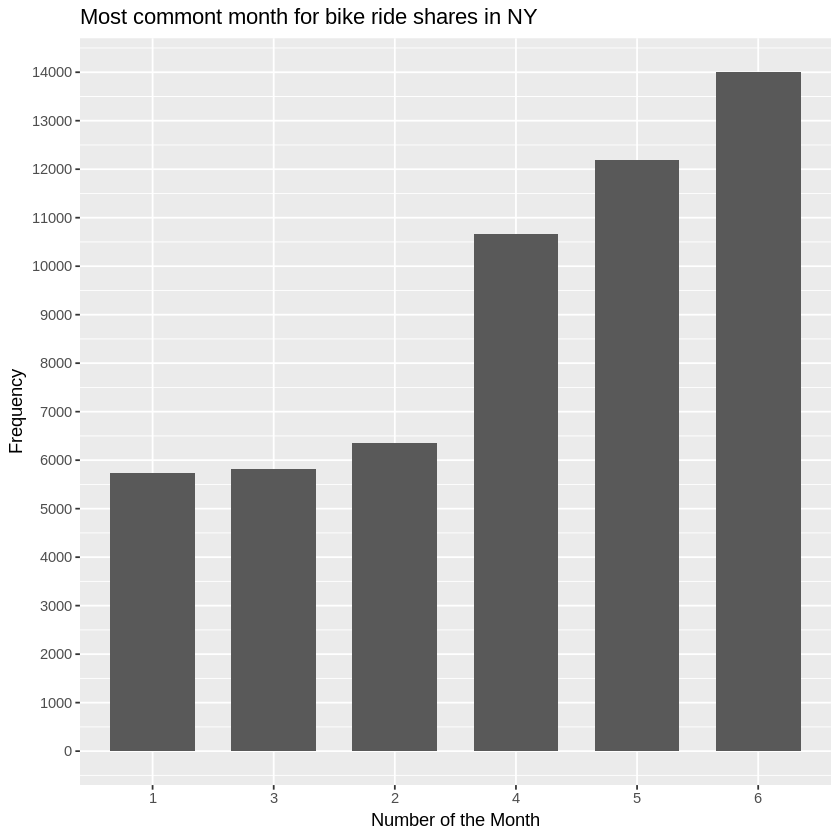

In [199]:
#plottting
ggplot(data = df_months_ny, aes(months, Freq)) + geom_bar(stat = 'identity', width = 0.7) + 
ggtitle('Most commont month for bike ride shares in NY') + 
labs(x = 'Number of the Month', y = 'Frequency') +
scale_y_continuous(breaks = seq(0,14500, 1000))

In [200]:
#To make it easier and more efficent for other 2 cities to find a common month, we'll create a function for a repetitive tasks
common_month_city <- function(city) {
    #getting the name of the function variable as a string, and by using loop we match it with the right city name.
    gg_title_string <- deparse(substitute(city))
    title_name <- ""
    if (gg_title_string == 'ny') {
        title_name = 'New York' 
    } else if (gg_title_string == 'wash') {
        title_name = 'Washington'
    } else {
        title_name = 'Chicago'
    }
    #same steps as we used above for NY
    city$Start.Time <- ymd_hms(city$Start.Time)
    months <- month(city$Start.Time)
    counts <- table(months)
    df_months <- as.data.frame(counts)
    df_months$months <- reorder(df_months$months, df_months$Freq)
    #for automatic y scale adjustment, well get the largest number in Freq column.
    largest_freq_num <- max(df_months$Freq)
    return(list(summary(df_months), ggplot(data = df_months, aes(months, Freq)) + geom_bar(stat = 'identity', width = 0.7) + 
ggtitle(sprintf("Most commont month for bike ride shares in %s", title_name)) + 
labs(x = 'Number of the Month', y = 'Frequency') +
scale_y_continuous(breaks = seq(0,(largest_freq_num + 500), 1000))))
}

[[1]]
 months      Freq      
 1:1    Min.   : 5745  
 3:1    1st Qu.: 5956  
 2:1    Median : 8512  
 4:1    Mean   : 9128  
 5:1    3rd Qu.:11800  
 6:1    Max.   :14000  

[[2]]


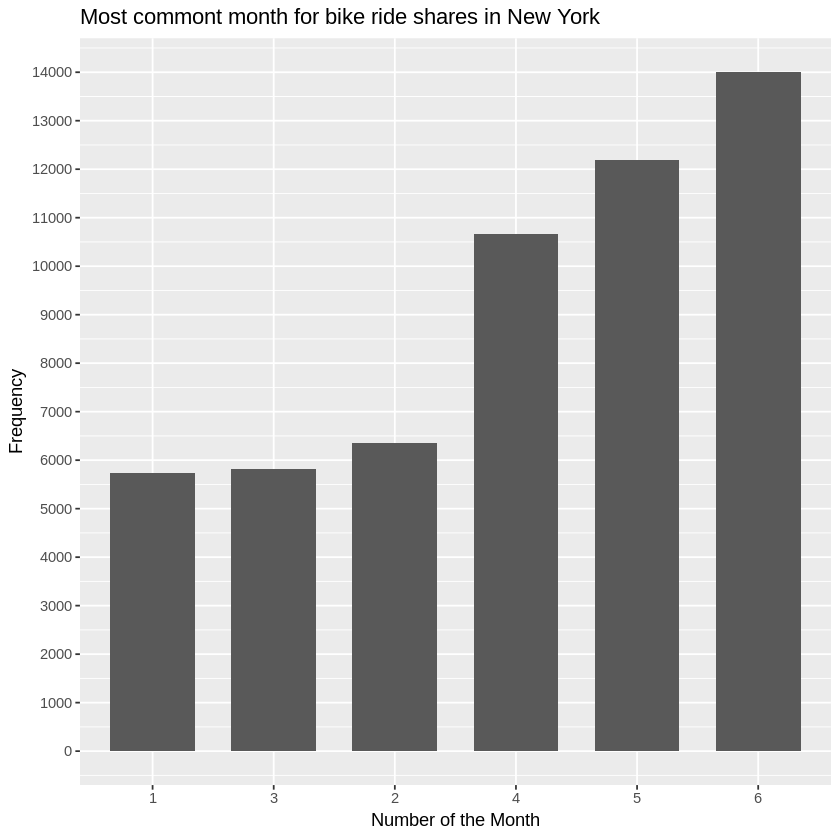

In [201]:
common_month_city(ny)

[[1]]
 months      Freq      
 1:1    Min.   : 8946  
 2:1    1st Qu.:11825  
 3:1    Median :14842  
 5:1    Mean   :14842  
 4:1    3rd Qu.:18160  
 6:1    Max.   :20335  

[[2]]


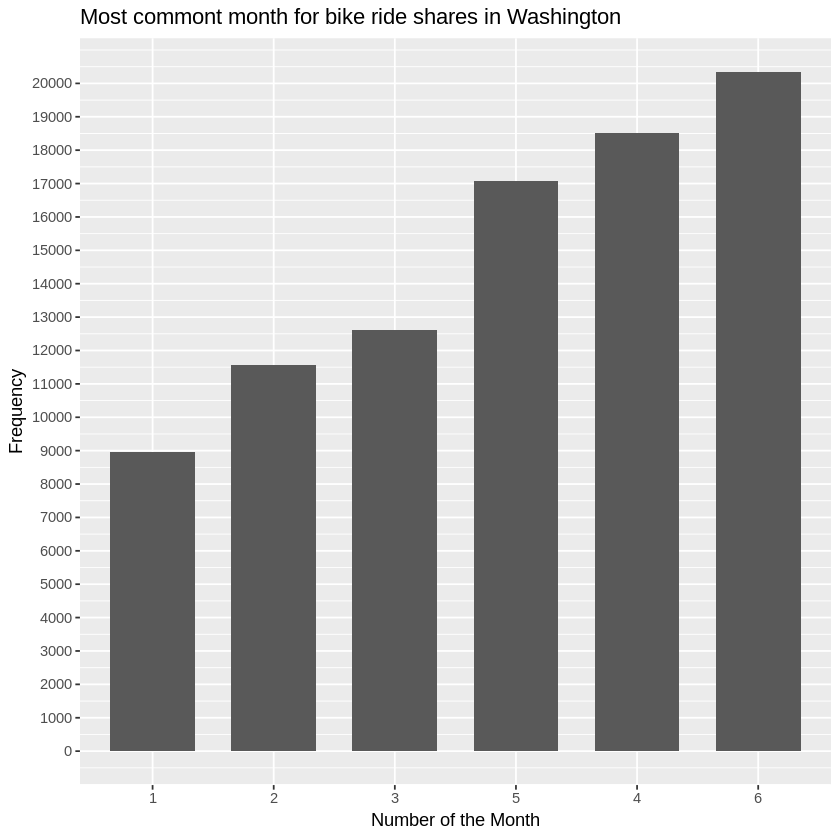

In [202]:
common_month_city(wash)

[[1]]
 months      Freq       
 1:1    Min.   : 650.0  
 3:1    1st Qu.: 834.8  
 2:1    Median :1228.0  
 4:1    Mean   :1438.3  
 5:1    3rd Qu.:1810.2  
 6:1    Max.   :2816.0  

[[2]]


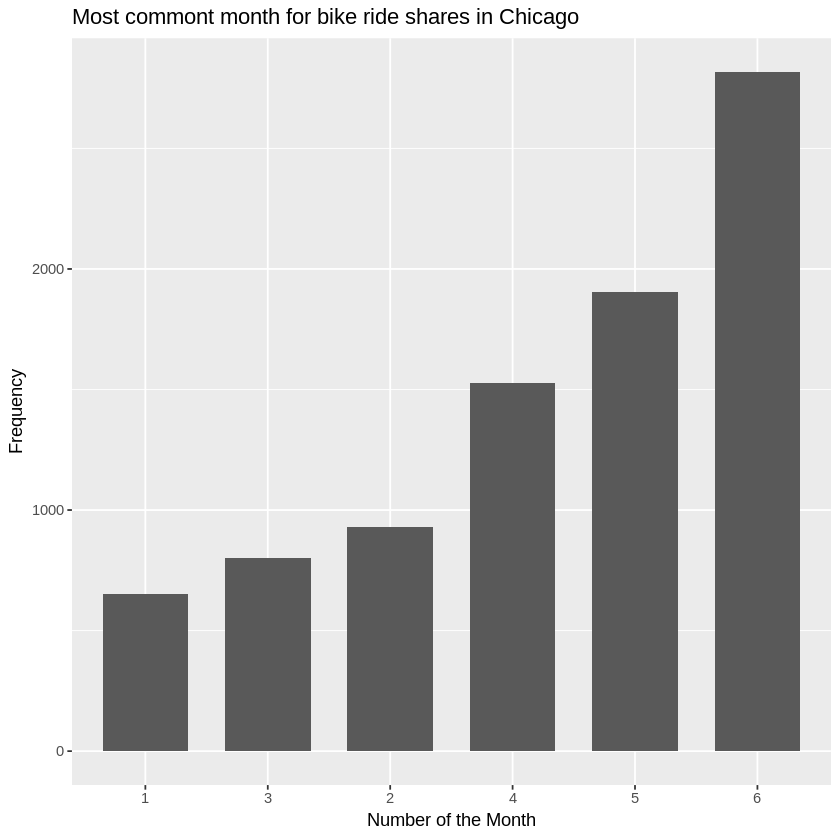

In [203]:
common_month_city(chi)

**Summary of your question 1 results goes here.**
Based on the datasets for New York, Washington, and Chicago related to shared bike riding, we observe the following trends for the most popular months: In New York, the peak months, in order of frequency, are June, May, and April. Washington shows a slightly different pattern, with June being the most common, followed by April and then May. Chicago's data aligns with New York, displaying June, May, and April as the top three months, respectively. It's important to note that these datasets are limited to the first half of the year, from January to June, and don't include data for the rest of the year.

### Question 2


**What is the most common start station?**

In [204]:
# Your solution code goes here

In [205]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [206]:
#selecting our Star.Street column
start_station <- ny$Start.Station

In [207]:
#creating a new dataframe from unique values given by table() function
df_start_station <- as.data.frame(table(start_station))

In [208]:
#giving names for our columns
names(df_start_station) <- c('street', 'freq')

In [209]:
head(df_start_station)

street,freq
,1
1 Ave & E 16 St,214
1 Ave & E 18 St,192
1 Ave & E 30 St,166
1 Ave & E 44 St,113
1 Ave & E 62 St,145


In [210]:
#filtering empty values
df_start_station <- df_start_station[df_start_station$street != '', ]

In [211]:
#ascending order by frequency
df_start_station <- df_start_station[order(df_start_station$freq, decreasing = FALSE), ]

In [212]:
plot_tail <- tail(df_start_station, 5)

In [213]:
plot_tail

,street,freq
625,West St & Chambers St,364
231,E 17 St & Broadway,380
113,Broadway & E 22 St,383
557,W 21 St & 6 Ave,385
467,Pershing Square North,592


In [214]:
#ascending order of fragment levels for better visualization
plot_tail$street <- reorder(plot_tail$street, plot_tail$freq)

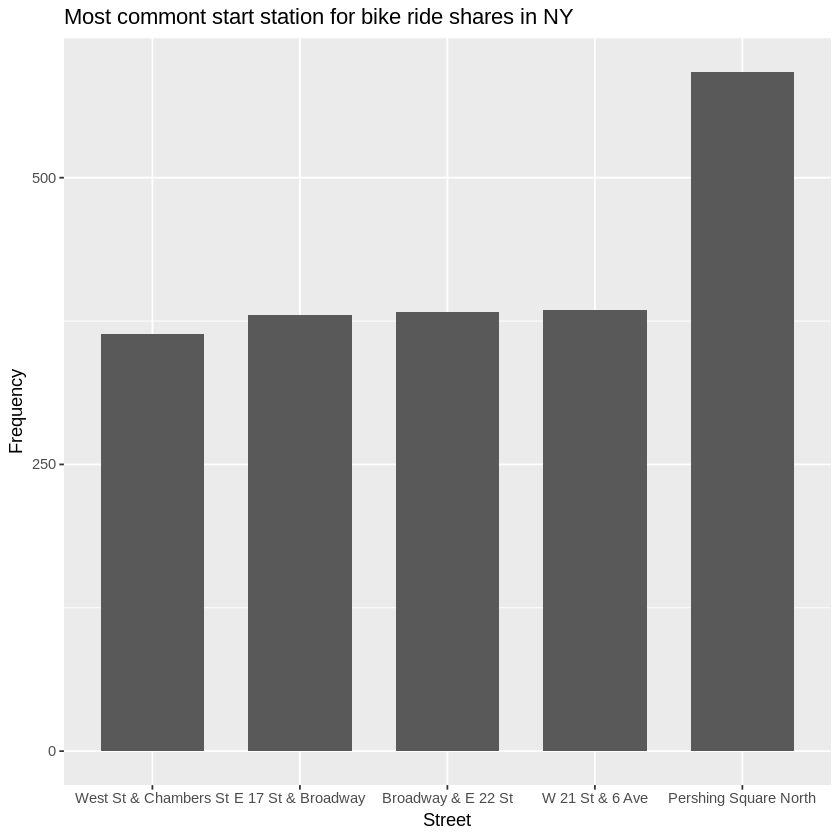

In [215]:
#plotting top 5 common start statinons in NY
ggplot(data = plot_tail[1:5,], aes(street, freq)) +
geom_bar(stat = 'identity', width = 0.7) + 
ggtitle('Most commont start station for bike ride shares in NY') + 
labs(x = 'Street', y = 'Frequency') +
scale_y_continuous(breaks = seq(0,600, 250))

In [216]:
#creating an easy to use function for more efficient use of the code.

In [217]:
comm_start_station <- function(city) {
    #getting the name of the function variable as a string, and by using loop we match it with the right city name.
    gg_title_string <- deparse(substitute(city))
    title_name <- ""
    if (gg_title_string == 'ny') {
        title_name = 'New York' 
    } else if (gg_title_string == 'wash') {
        title_name = 'Washington'
    } else if (gg_title_string == 'chi'){
        title_name = 'Chicago'
    } else {
        print('No data.')
    }
    start_station <- city$Start.Station
    df_start_station <- as.data.frame(table(start_station))
    names(df_start_station) <- c('street', 'freq')
    df_start_station <- df_start_station[df_start_station$street != '', ]
    df_start_station <- df_start_station[order(df_start_station$freq, decreasing = FALSE), ]
    plot_tail <- tail(df_start_station, 5)
    plot_tail$street <- reorder(plot_tail$street, plot_tail$freq)
    #for automatic y scale we'll get largest value
    largest_freq_num <- max(plot_tail$freq)
    
    return(list(summary(plot_tail),
           ggplot(data = plot_tail[1:5,], aes(street, freq)) +
geom_bar(stat = 'identity', width = 0.7) + 
ggtitle(sprintf('Most commont start station for bike ride shares in %s', title_name)) + 
labs(x = 'Street', y = 'Frequency') +
scale_y_continuous(breaks = seq(0,(100 + largest_freq_num), 150)) +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))))
#vertical x labeling
}

[[1]]
                   street       freq      
 West St & Chambers St:1   Min.   :364.0  
 E 17 St & Broadway   :1   1st Qu.:380.0  
 Broadway & E 22 St   :1   Median :383.0  
 W 21 St & 6 Ave      :1   Mean   :420.8  
 Pershing Square North:1   3rd Qu.:385.0  
                      :0   Max.   :592.0  
 (Other)              :0                  

[[2]]


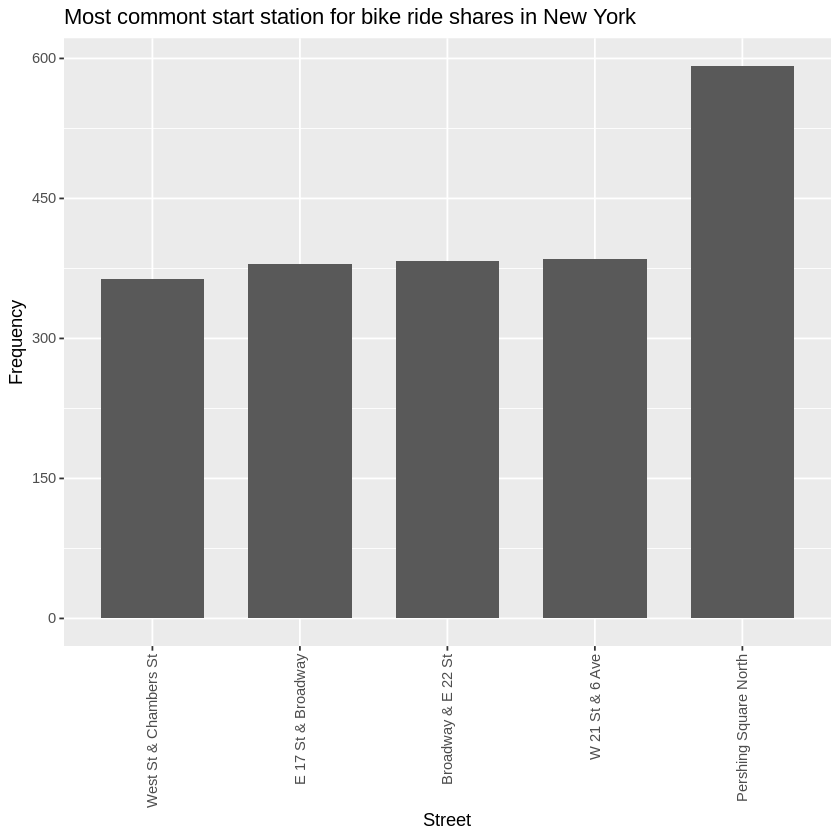

In [218]:
comm_start_station(ny)

[[1]]
                                  street       freq     
 Jefferson Memorial                  :1   Min.   :1068  
 Massachusetts Ave & Dupont Circle NW:1   1st Qu.:1219  
 Jefferson Dr & 14th St SW           :1   Median :1488  
 Lincoln Memorial                    :1   Mean   :1404  
 Columbus Circle / Union Station     :1   3rd Qu.:1546  
                                     :0   Max.   :1700  
 (Other)                             :0                 

[[2]]


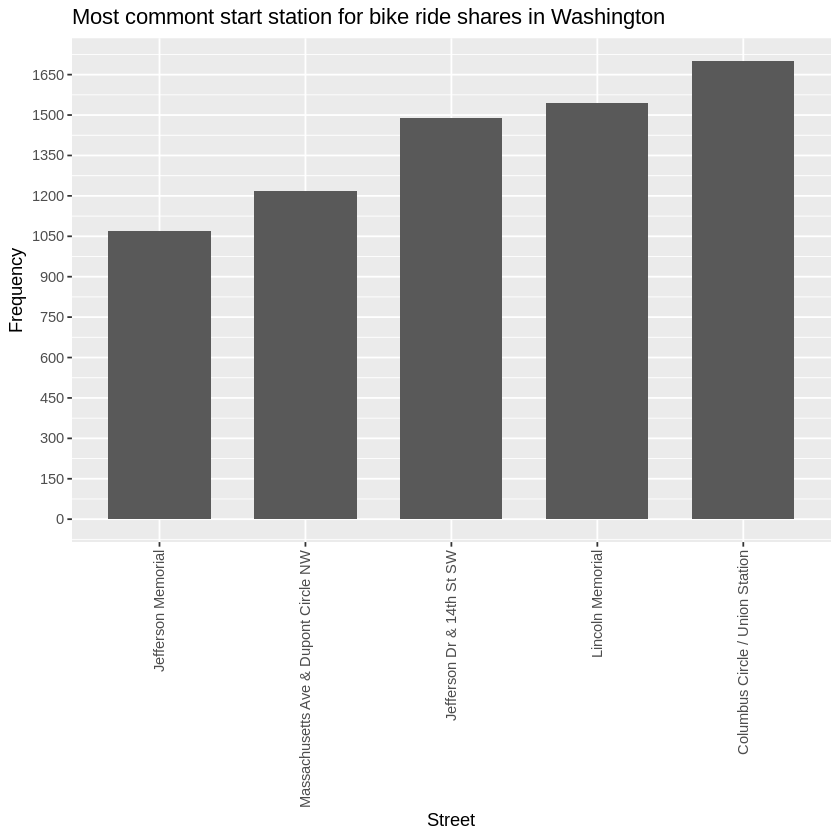

In [219]:
comm_start_station(wash)

[[1]]
                          street       freq      
 Canal St & Adams St         :1   Min.   :101.0  
 Clinton St & Madison St     :1   1st Qu.:102.0  
 Clinton St & Washington Blvd:1   Median :120.0  
 Lake Shore Dr & Monroe St   :1   Mean   :134.6  
 Streeter Dr & Grand Ave     :1   3rd Qu.:140.0  
 2112 W Peterson Ave         :0   Max.   :210.0  
 (Other)                     :0                  

[[2]]


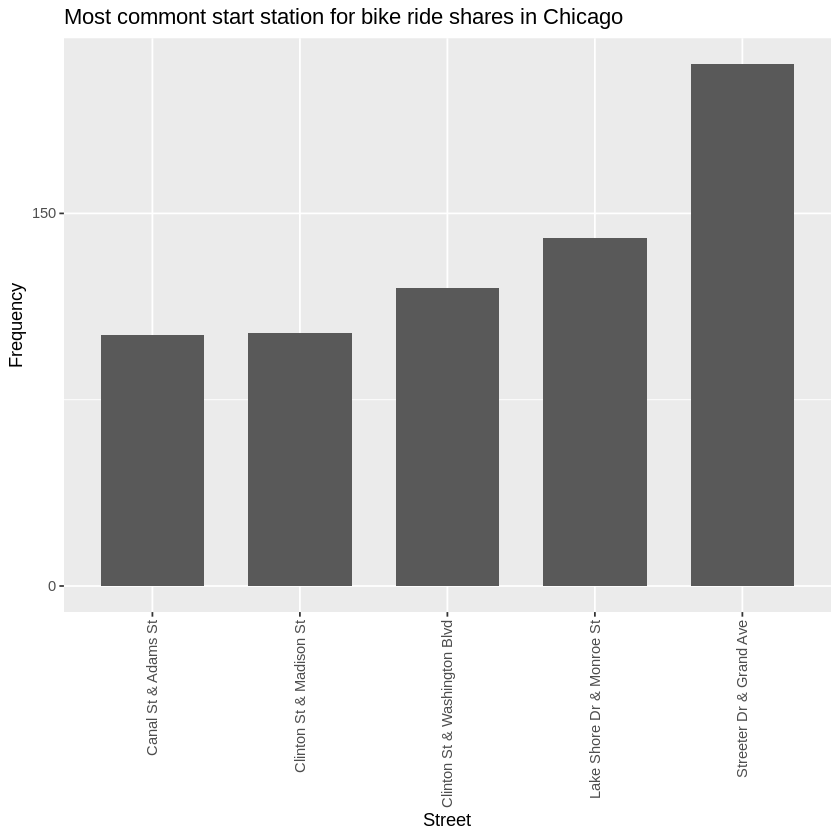

In [220]:
comm_start_station(chi)

**Summary of your question 2 results goes here.**
Based on the datasets for New York, Washington, and Chicago related to shared bike riding, we observe the following trends for the most popular streets for starting the ride: In New York, in order of frequency, are Pershing Square North, W 21st & 6 ave, Broadway & E 22st.
Washington's are Columbus Circle / Union Station, Lincoln Memorial, Jefferson Dr & 14th St SW.
Chicago's are Streeter DR & Grand Ave, Lake Shore Dr & Monroe St, Clinton St & Washington Blvd.

### Question 3

**What is the average travel time for users in different cities?**

In [221]:
#selecting Trip.Duration column for each city, excluding NA values
trip_duration_ny <- ny$Trip.Duration[!is.na(ny$Trip.Duration)]

In [222]:
trip_duration_wash <- wash$Trip.Duration[!is.na(wash$Trip.Duration)]

In [223]:
trip_duration_chi <- ny$Trip.Duration[!is.na(ny$Trip.Duration)]

In [224]:
#transforming average seconds to rounded minutes, for aeach city
avg_trip_ny <- round(mean(trip_duration_ny) / 60)

In [225]:
avg_trip_wash <- round(mean(trip_duration_wash) / 60)

In [226]:
avg_trip_chi <- round(mean(trip_duration_chi) / 60)

In [227]:
#crating names for our new dataframe, and dataframe itself with city names and time values.
city_names <- c('NY', "Washington", 'Chicago')

In [228]:
avg_time_df <- data.frame(city_names, c(avg_trip_ny, avg_trip_wash, avg_trip_chi))

In [229]:
names(avg_time_df) <- c('city','avg_trip_time')

In [230]:
summary(avg_time_df)

         city   avg_trip_time
 Chicago   :1   Min.   :15   
 NY        :1   1st Qu.:15   
 Washington:1   Median :15   
                Mean   :17   
                3rd Qu.:18   
                Max.   :21   

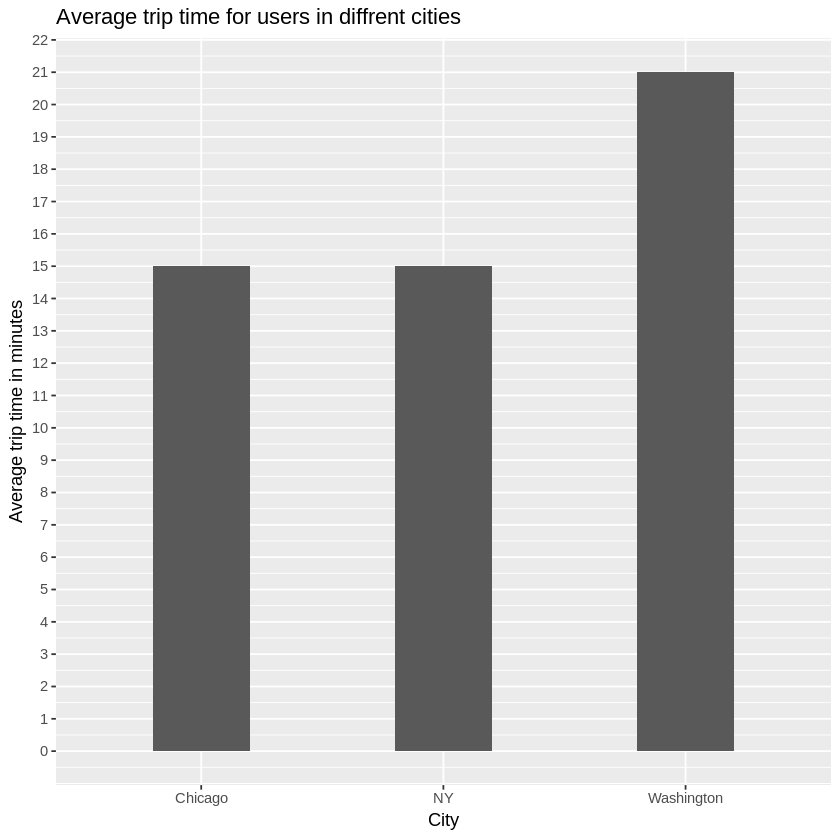

In [231]:
ggplot(data = avg_time_df, aes(x = city, y = avg_trip_time)) +
geom_bar(stat = 'identity', width = 0.4) +
scale_y_continuous(breaks = seq(0,25,1)) +
ylab('Average trip time in minutes') +
xlab('City') +
ggtitle('Average trip time for users in diffrent cities')

**Summary of your question 3 results goes here.**
Based on the datasets for New York, Washington, and Chicago related to shared bike riding, we observe the following trends for the average trip time in minutes: In New York, average trip time is rounded 15 min, in Chicago average trip time is rounded 15 min, and in Washington average trip time is the lagest which is rounded 21 min.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')